In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2013_movies.csv')

In [3]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


# Exercise 2.1

In [7]:
df['ReleaseDate']= pd.to_datetime(df.ReleaseDate, infer_datetime_format = True)

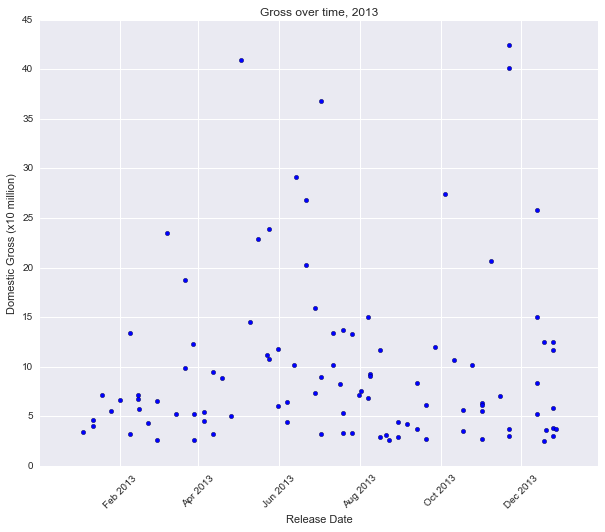

In [60]:
T = np.array(df.ReleaseDate)
G = np.array(df.DomesticTotalGross)
plt.figure(figsize=(10,8))
plt.scatter(T, G/1e7)
plt.xlabel('Release Date')
plt.ylabel('Domestic Gross (x10 million)')
plt.title('Gross over time, 2013')
plt.xticks(rotation = 45);

# Exercise 2.2

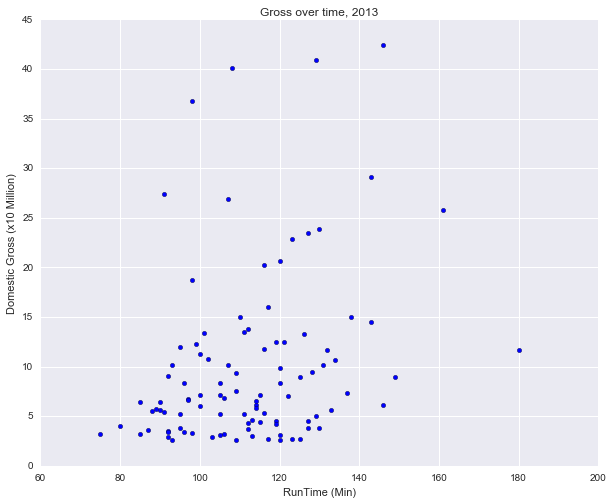

In [59]:
RT = np.array(df.Runtime)
plt.figure(figsize=(10,8))
plt.scatter(RT, G/1e7)
plt.xlabel('RunTime (Min)')
plt.ylabel('Domestic Gross (x10 Million)')
plt.title('Gross over time, 2013');

# Exercise 2.3

In [57]:
ratingGrouped = df.groupby('Rating')['Runtime', 'DomesticTotalGross'].mean().reset_index()

ratingGrouped

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


In [149]:

# group = df.Rating.unique()
# group

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

# Exercise 2.4

/Users/kylemix/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


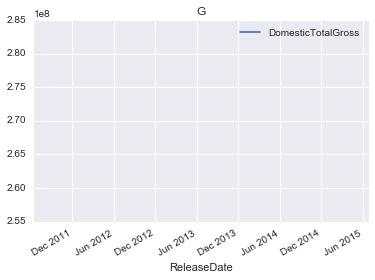

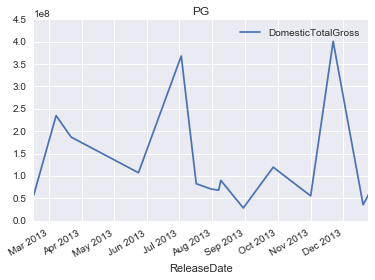

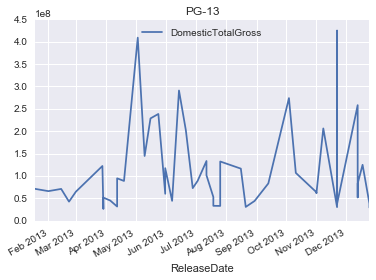

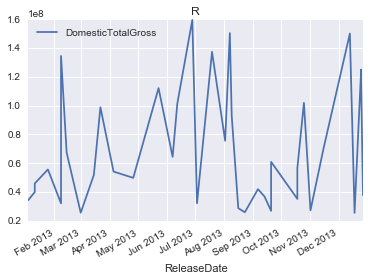

In [207]:
# this works,  but would be better as scatter,  having trouble doing that
for i, group in df.groupby(['Rating']):
    plt.figure()
    group.plot(x='ReleaseDate', y='DomesticTotalGross', title=str(i))


# Exercise 2.5

In [176]:
DirectorGroup = df.groupby('Director')['DomesticTotalGross'].mean().reset_index()

In [181]:
DirectorGroup.sort_values('DomesticTotalGross', ascending=False).head(1)


,Director,DomesticTotalGross
27,Francis Lawrence,424668047


# Exercise 2.6

In [195]:
df['ReleaseMonth'] = df['ReleaseDate'].dt.month

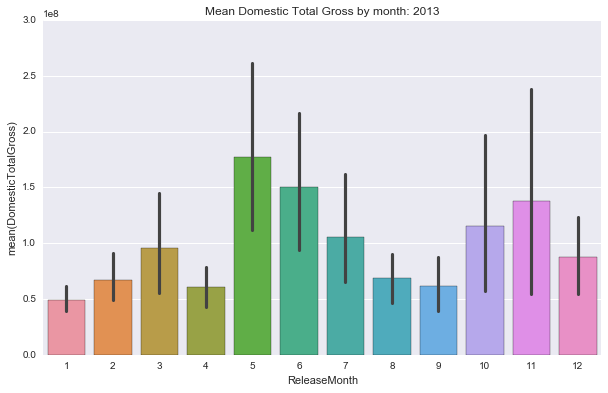

In [202]:
plt.figure(figsize=(10,6))
ax = plt.axes()
sns.barplot(x=df.ReleaseMonth.sort_values(), y = df.DomesticTotalGross)
ax.set_title('Mean Domestic Total Gross by month: 2013')